# Hawaii Climate Analysis

In [ ]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables- SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper

import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [4]:
 # create engine to hawaii.sqlite
    
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model

Base = automap_base()

# reflect the tables

Base.prepare(engine, reflect=True)

In [6]:
# View all of the classes that automap found

Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table

measure = Base.classes.measurement
station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB

session = Session(engine)

In [9]:
#inspector
inspector = inspect(engine)
    

In [10]:
# Columns for measurement table

columns_measure = inspector.get_columns('measurement')
for c in columns_measure:
    print(c['name'],c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [11]:
#Columns for station table

columns_station = inspector.get_columns('station')
for s in columns_station:
    print(s['name'],s['type'])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


# Precipitation Analysis

#### Design a query to retrieve the last 12 months of precipitation data and plot the results. 

In [12]:
# Find the most recent date in the data set (Max date)

recent_date = session.query(func.max(func.strftime("%Y-%m-%d", measure.date))).limit(5).all()
recent_date[0][0]

'2017-08-23'

In [13]:
 # Calculate the date one year from the last date in data set.
# Perform a query to retrieve the data and precipitation scores

precip_data = session.query(func.strftime("%Y-%m-%d", measure.date), measure.prcp).\
filter(func.strftime("%Y-%m-%d",measure.date) >= dt.date(2016,8,23)).all()

In [14]:
# Save the query results as a Pandas DataFrame and set the index to the date column

precip_df = pd.DataFrame(precip_data, columns = ['date', 'precipitation'])

#set the index to the date column

precip_df.set_index('date', inplace = True)

# Sort the dataframe by date
precip_df = precip_df.sort_values(by='date')
precip_df.head(10)

,precipitation
date,
2016-08-23,0.00
2016-08-23,NaN
2016-08-23,1.79
2016-08-23,0.05
2016-08-23,0.15
2016-08-23,0.70
2016-08-23,0.02
2016-08-24,0.08
2016-08-24,2.15


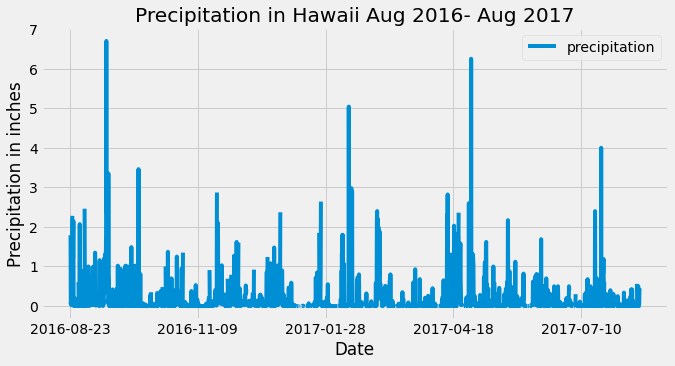

<Figure size 432x288 with 0 Axes>

In [26]:
# Use Pandas Plotting with Matplotlib to plot the data

fig, ax = plt.subplots(figsize = (10, 5))
precip_df.plot(ax = ax, x_compat = True)

#Plot Labels

ax.set_xlabel('Date')
ax.set_ylabel('Precipitation in inches')
ax.set_title("Precipitation in Hawaii Aug 2016- Aug 2017")
plt.show()


#Save Plot 

plt.savefig("precip.png")

In [16]:
# Use Pandas to calcualte the summary statistics for the precipitation data
precip_df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Station Analysis

In [17]:
 # Design a query to calculate the total number stations in the dataset

stations_total = session.query(func.count(station.station)).all()
stations_total

[(9)]

In [18]:
 # Design a query to find the most active stations (i.e. what stations have the most rows?)
 
stations_active = session.query(measure.station, func.count(measure.station)).all()
stations_active


[('USC00519397', 19550)]

In [19]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.

In [20]:
 # Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

# Close session

In [21]:
# Close Session
session.close()